# 1. Exploraci√≥n de los datos

In [32]:
#Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4= pd.read_csv(url4)


In [19]:
# Agregando una columna para identificar la tienda
tienda_1['tienda'] = 'Tienda 1'
tienda_2['tienda'] = 'Tienda 2'
tienda_3['tienda'] = 'Tienda 3'
tienda_4['tienda'] = 'Tienda 4'

# Unir los datos en un solo DataFrame
df = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)
# Visualizando las primeras filas
# 1 Visualizamos los ingresos totales por tienda

df.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon    tienda  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  Tienda 1  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  Tienda 1  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  Tienda 1  
3               Nequi                   1   3.43722 -76.52250  Tienda 1  
4               Nequi                   1   6.25184 -75.56359  Tienda 1

# 2. An√°lisis de facturaci√≥n

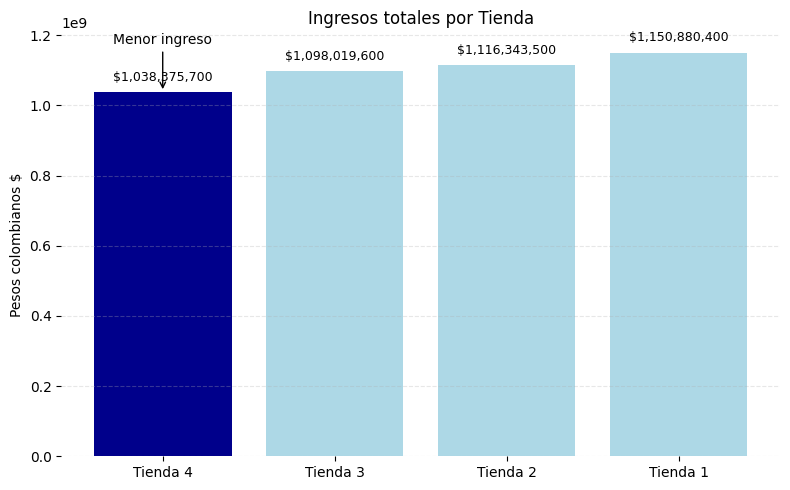

In [41]:
# 1) Calcular ingresos por tienda
ingresos = df.groupby('tienda')['Precio'].sum().sort_values().round(0)

# 2) Preparar etiquetas y valores
labels = ingresos.index.astype(str).tolist()
values = ingresos.values

# 3) Identificar la tienda con menor ingreso (etiqueta)
min_label = ingresos.idxmin()

# 4) Crear lista de colores: rojo para la tienda m√≠nima, celeste para las dem√°s
colors = ['darkblue' if lab == min_label else 'lightblue' for lab in labels]

# 5) Dibujar el gr√°fico con matplotlib (control total de colores)
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(range(len(values)), values, color=colors)

# Ajustes de ejes y etiquetas
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_title('Ingresos totales por Tienda')
ax.set_ylabel('Pesos colombianos $')
ax.set_xlabel('')

# 6) A√±adir el valor num√©rico encima de cada barra (formato con separador de miles)
max_val = values.max() if len(values) else 0
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + max_val * 0.02,                # un peque√±o offset sobre la barra
        f"${h:,.0f}",                      # formato con separador de miles
        ha='center',
        va='bottom',
        fontsize=9
    )

# 7) Opcional: anotar cu√°l es la tienda con menor ingreso
min_idx = labels.index(min_label)
ax.annotate('Menor ingreso',
            xy=(min_idx, values[min_idx]),
            xytext=(min_idx, values[min_idx] + max_val * 0.12),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            ha='center')

# 8) Limpiar bordes y mostrar rejilla horizontal ligera
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Ventas por categor√≠a

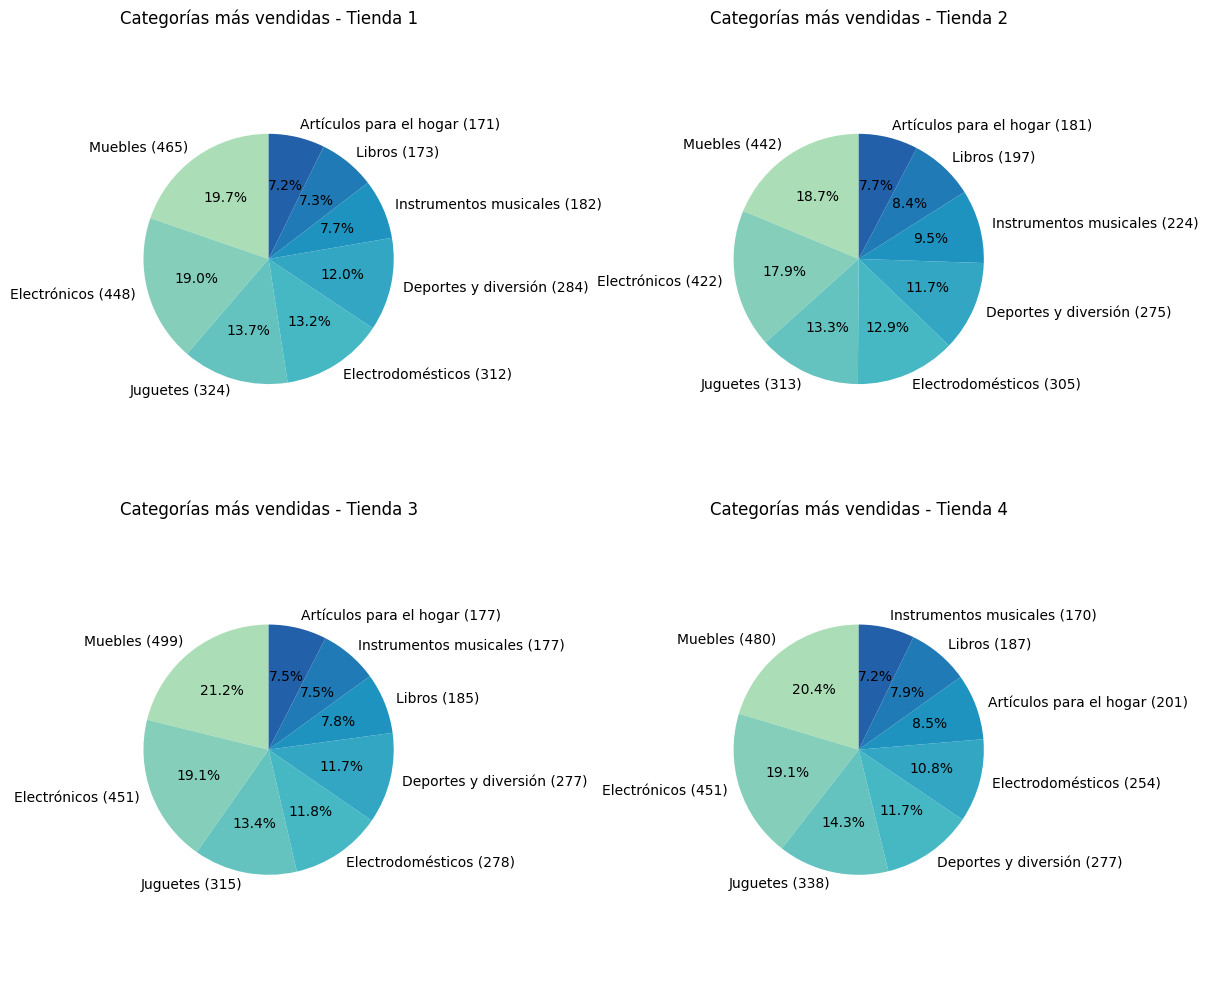

In [39]:
#colors=['blue','cyan', 'skyblue','navy',]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
titulos = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
# Colores en escala azul
#colores = plt.cm.Blues(np.linspace(0.4, 1, len(df.columns) - 1))
#colores = plt.cm.PuBuGn(np.linspace(0.3, 1, len(df.columns)-1))
colores = plt.cm.YlGnBu(np.linspace(0.3, 1, len(df.columns)-1))
#colores = plt.cm.cool(np.linspace(0, 1, len(df.columns)-1))
#colores = plt.cm.cividis(np.linspace(0, 1,len(df.columns)-1))

for ax, tienda, titulo in zip(axs.flatten(), tiendas, titulos):
    categorias = tienda['Categor√≠a del Producto'].value_counts()

    # Etiquetas con nombre de categor√≠a + valor absoluto
    etiquetas = [f"{cat} ({valor})" for cat, valor in zip(categorias.index, categorias.values)]

    ax.pie(
        categorias,
        labels=etiquetas,
        autopct='%1.1f%%',colors=colores,
        startangle=90
    )
    ax.set_title(f"Categor√≠as m√°s vendidas - {titulo}")
    ax.axis('equal')  # Mantener forma circular

plt.tight_layout()
plt.show()

# 5. Calificaci√≥n promedio de la tienda

In [30]:
# Calculamos las calificaciones promedio de los clientes para cada tienda
# El objetivo es conocer la satisfacci√≥n del cliente con los productos vendidos.
promedios = {'Tienda 1': round(tienda_1['Calificaci√≥n'].mean(), 2),
            'Tienda 2': round(tienda_2['Calificaci√≥n'].mean(), 2),
            'Tienda 3': round(tienda_3['Calificaci√≥n'].mean(), 2),
            'Tienda 4': round(tienda_4['Calificaci√≥n'].mean(), 2),
}

# Mostrar resultados
print(" Calificaci√≥n promedio por tienda:")
for tienda, calificacion in promedios.items():
    print(f"{tienda}: {calificacion} estrellas")

 Calificaci√≥n promedio por tienda:
Tienda 1: 3.98 estrellas
Tienda 2: 4.04 estrellas
Tienda 3: 4.05 estrellas
Tienda 4: 4.0 estrellas


# 4. Productos m√°s y menos vendidos

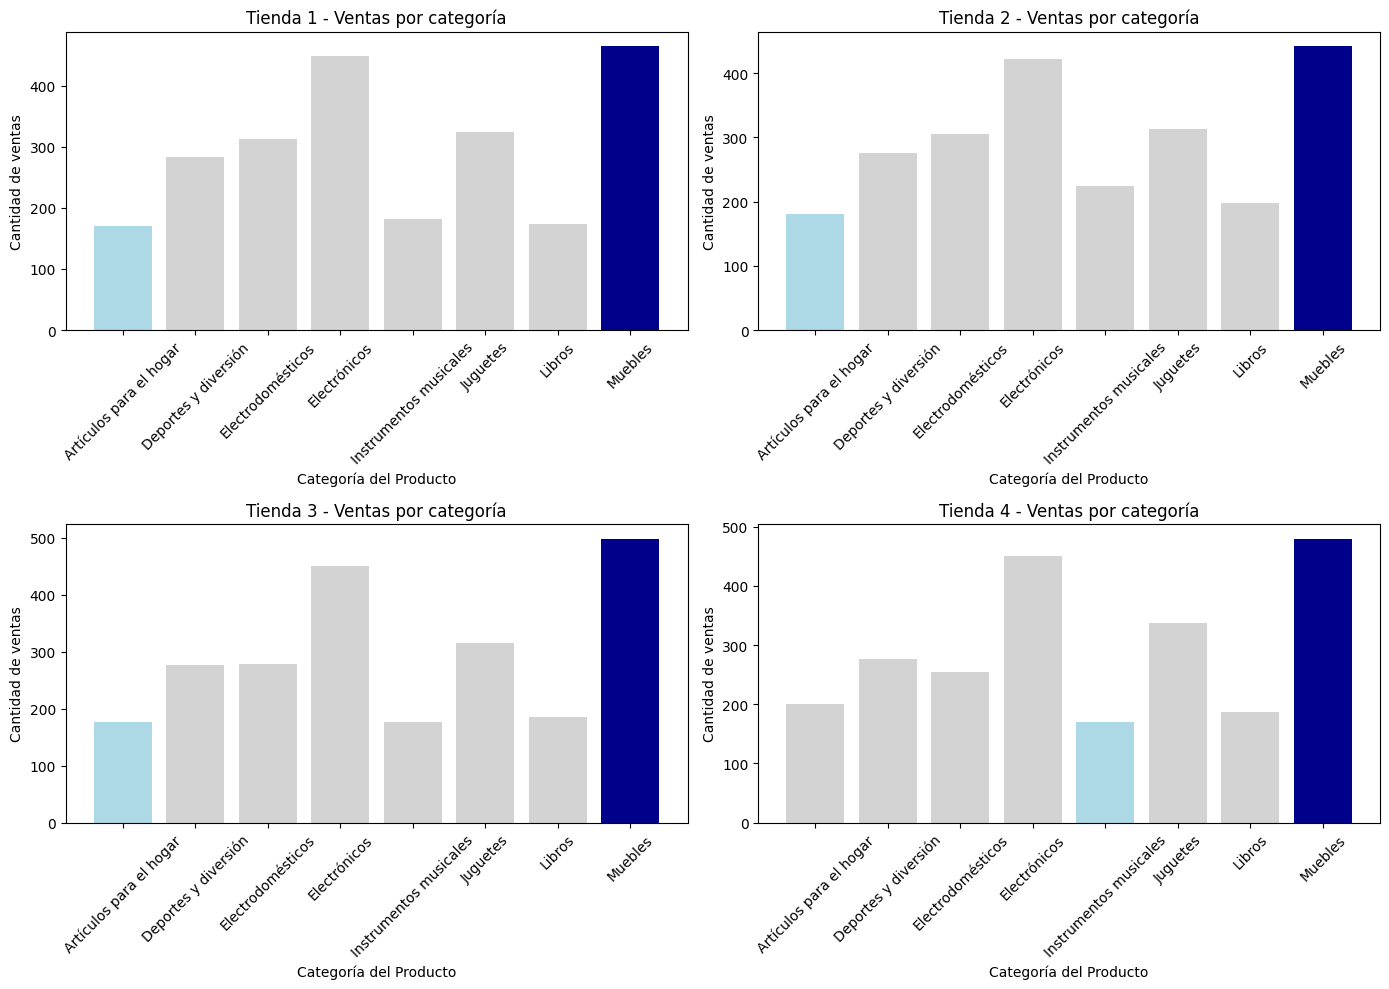

In [42]:
# Agrupar por tienda y categor√≠a para contar cantidad de productos vendidos
ventas_categoria = df.groupby(['tienda', 'Categor√≠a del Producto']).size().reset_index(name='Cantidad de ventas')

# Configurar subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Iterar por tienda y generar gr√°fico
for i, tienda in enumerate(ventas_categoria['tienda'].unique()):
    # Filtrar datos de la tienda
    datos_tienda = ventas_categoria[ventas_categoria['tienda'] == tienda]

    # Encontrar la categor√≠a m√°s y menos vendida
    max_cat = datos_tienda.loc[datos_tienda['Cantidad de ventas'].idxmax(), 'Categor√≠a del Producto']
    min_cat = datos_tienda.loc[datos_tienda['Cantidad de ventas'].idxmin(), 'Categor√≠a del Producto']

    # Asignar colores
    colores = datos_tienda['Categor√≠a del Producto'].apply(
        lambda x: 'darkblue' if x == max_cat else ('lightblue' if x == min_cat else 'lightgray')
    )

    # Graficar
    axs[i].bar(datos_tienda['Categor√≠a del Producto'], datos_tienda['Cantidad de ventas'], color=colores)
    axs[i].set_title(f"{tienda} - Ventas por categor√≠a")
    axs[i].set_xlabel("Categor√≠a del Producto")
    axs[i].set_ylabel("Cantidad de ventas")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Env√≠o promedio por tienda

In [58]:
costo_promedio_envio = df.groupby('tienda')['Costo de env√≠o'].mean().round(2)
print(f"El costo promedio por tienda fue:\n{costo_promedio_envio}" )

El costo promedio por tienda fue:
tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de env√≠o, dtype: float64


In [66]:
#Comparando el precio y calificaci√≥n del cliente de cada una de las tienda
descripcion = df.groupby('tienda')[['Precio','Calificaci√≥n','Costo de env√≠o']].describe()
descripcion

Precio                                                           \
           count           mean            std     min      25%       50%   
tienda                                                                      
Tienda 1  2359.0  487867.910131  614686.765387  7600.0  55750.0  235300.0   
Tienda 2  2359.0  473227.426876  595559.549624  7600.0  54550.0  218200.0   
Tienda 3  2359.0  465459.771089  580643.391372  7600.0  57400.0  226300.0   
Tienda 4  2358.0  440362.892282  568755.603949  7600.0  53400.0  209450.0   

                              Calificaci√≥n            ...            \
               75%        max        count      mean  ...  75%  max   
tienda                                                ...             
Tienda 1  678100.0  2977000.0       2359.0  3.976685  ...  5.0  5.0   
Tienda 2  677700.0  2953400.0       2359.0  4.037304  ...  5.0  5.0   
Tienda 3  666050.0  2968200.0       2359.0  4.048326  ...  5.0  5.0   
Tienda 4  634225.0  2902200.0       2358.0  3.995759  ...  5.0  5.0   

         Costo de env√≠o                                                    \
                  count          mean           std  min     25%      50%   
tienda                                                                      
Tienda 1         2359.0  26018.609580  32860.001783  0.0  3100.0  12400.0   
Tienda 2         2359.0  25216.235693  31741.375166  0.0  2900.0  11600.0   
Tienda 3         2359.0  24805.680373  30945.889626  0.0  3100.0  11900.0   
Tienda 4         2358.0  23459.457167  30279.100836  0.0  2900.0  10950.0   

                             
              75%       max  
tienda                       
Tienda 1  36000.0  160800.0  
Tienda 2  35450.0  162500.0  
Tienda 3  34950.0  158400.0  
Tienda 4  33300.0  154700.0  

[4 rows x 24 columns]

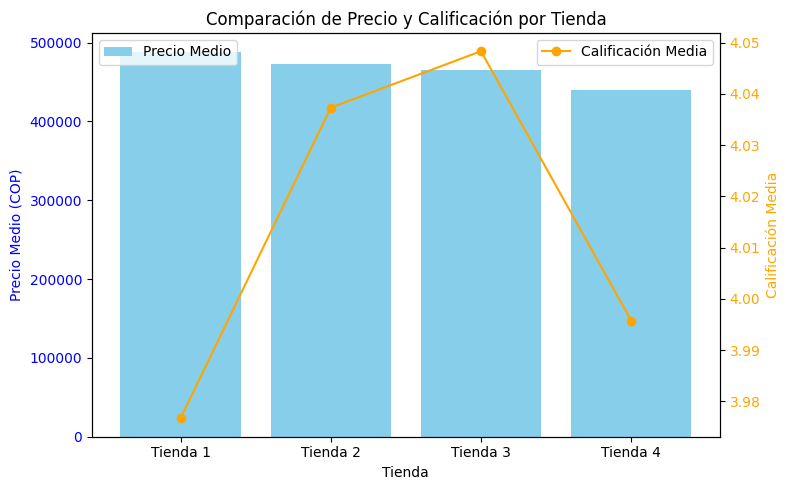

In [67]:
# Datos del resumen
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Precio Medio': [487867.91, 473227.43, 465459.77, 440362.89],
    'Calificaci√≥n Media': [3.976685, 4.037304, 4.048326, 3.995759]
}

df = pd.DataFrame(data)

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Gr√°fico de barras (Precio Medio)
ax1.bar(df['Tienda'], df['Precio Medio'], color='skyblue', label='Precio Medio')
ax1.set_xlabel('Tienda')
ax1.set_ylabel('Precio Medio (COP)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear segundo eje para Calificaci√≥n Media
ax2 = ax1.twinx()
ax2.plot(df['Tienda'], df['Calificaci√≥n Media'], color='orange', marker='o', label='Calificaci√≥n Media')
ax2.set_ylabel('Calificaci√≥n Media', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# T√≠tulo
plt.title('Comparaci√≥n de Precio y Calificaci√≥n por Tienda')

# Leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# **Informe**

## Introducci√≥n:
El Sr. Juan busca decidir qu√© tienda de la cadena Alura Store vender para financiar un nuevo emprendimiento. Para tomar esta decisi√≥n, se realiz√≥ un an√°lisis comparativo de las cuatro tiendas en t√©rminos de ingreso promedio de productos, calificaci√≥n promedio de clientes y costo promedio de env√≠o.
El objetivo es identificar la tienda menos eficiente en relaci√≥n con sus pares, evaluando sus fortalezas y debilidades.

##Desarrollo del an√°lisis:
1. Ingreso promedio en pesos colombianos por tienda

Tienda 1: $ 1 150 880 400

Tienda 2: $ 1 116 343 500

Tienda 3: $ 1 098 019 600

Tienda 4: $ 1 038 375 700 (menor precio promedio)

üí° Un ingreso promedio m√°s bajo podr√≠a indicar menor margen de ganancia por producto.

2. Calificaci√≥n promedio

Tienda 1: 3.98

Tienda 2: 4.04

Tienda 3: 4.05 (mejor calificaci√≥n)

Tienda 4: 3.99

üí° La Tienda 4 tiene una calificaci√≥n similar a la Tienda 1, pero por debajo de Tienda 2 y Tienda 3, lo que indica menor satisfacci√≥n del cliente.

3. Costo promedio de env√≠o en pesos colombianos

Tienda 1: $ 26,018.61

Tienda 2: $ 25,216.24

Tienda 3: $ 24,805.68

Tienda 4: $ 23,459.46 (menor costo promedio)

üí° El costo de env√≠o m√°s bajo de la Tienda 4 puede ser positivo para el cliente, pero tambi√©n sugiere que podr√≠a estar manejando zonas de distribuci√≥n m√°s limitadas o con menor alcance.

Analizando en conjunto:

Fortalezas de Tienda 4: menor precio y menor costo de env√≠o.

Debilidades de Tienda 4: menor calificaci√≥n promedio junto con Tienda 1, lo que indica menor satisfacci√≥n del cliente, y precios bajos que podr√≠an estar reduciendo la rentabilidad.

Comparada con el resto, no presenta una ventaja competitiva clara: no lidera en satisfacci√≥n, no tiene los precios m√°s rentables y el menor costo de env√≠o no compensa la percepci√≥n del cliente.


üìå Conclusi√≥n y Recomendaci√≥n:

Vender la Tienda 4.

Es la que muestra menor eficiencia global: tiene el menor ingresos promedio de las 4 tiendas, en la satisfacci√≥n del cliente no destaca y, aunque su costo de env√≠o es reducido, no es suficiente para posicionarla mejor que las dem√°s.

Esto la convierte en la candidata ideal para venderla o reestructurarla, manteniendo la cadena las tiendas con mayor calificaci√≥n y precios m√°s competitivos en t√©rminos de rentabilidad.
